In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 2.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.9 MB/s eta 0:00:000:00:01m eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
path = '../data/'
file = 'airport-codes.csv'
df = pd.read_csv(path+file)
df

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"40.07080078125, -74.93360137939453"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NaN,US,US-AK,King Salmon,00AN,NaN,00AN,"59.093287, -156.456699"
...,...,...,...,...,...,...,...,...,...,...,...,...
75843,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"51.894444, 1.4825"
75844,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"-11.584277777799999, 47.296388888900005"
75845,ZZ-0003,small_airport,Fainting Goat Airport,690.0,NaN,US,US-TX,Blum,87TX,NaN,87TX,"32.110587, -97.356312"
75846,ZZZW,closed,Scandium City Heliport,4.0,NaN,CA,CA-YT,(Old) Scandium City,NaN,NaN,NaN,"69.355287, -138.93931"


In [5]:
df.type.unique()


array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [6]:
df = df[df.type.isin(['medium_airport', 'large_airport'])]


In [7]:
df.name.value_counts()


name
Newcastle Airport                             3
La Florida Airport                            2
Faro Airport                                  2
Cochrane Airport                              2
Pemba Airport                                 2
                                             ..
Groton New London Airport                     1
Gainesville Regional Airport                  1
Greenville Downtown Airport                   1
Scholes International At Galveston Airport    1
Shenyang Dongta Airport                       1
Name: count, Length: 5204, dtype: int64

In [8]:
df['name'].str.contains('Memmingen', na=False).value_counts()


name
False    5215
True        1
Name: count, dtype: int64

In [9]:
df[df.iata_code=='MUC']

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
21771,EDDM,large_airport,Munich Airport,1487.0,EU,DE,DE-BY,Munich,EDDM,MUC,NaN,"48.353802, 11.7861"


In [60]:
eu_df = df[df['continent'] == 'EU'][['iata_code', 'name',"coordinates"]]
eu_df.reset_index(inplace=True)

In [61]:
eu_df

,index,iata_code,name,coordinates
0,13631,JAM,Bezmer Air Base,"42.4548988342, 26.3521995544"
1,13718,AEY,Akureyri Airport,"65.66000366210938, -18.07270050048828"
2,13729,EGS,Egilsstaðir Airport,"65.2833023071289, -14.401399612426758"
3,13745,HFN,Hornafjörður Airport,"64.295601, -15.2272"
4,13749,HZK,Húsavík Airport,"65.952301, -17.426001"
...,...,...,...,...
1029,73020,NaN,Soltsy-2 Air Base,"58.139545, 30.33042"
1030,73022,NaN,Severomorsk-3 Naval Air Base,"68.866669, 33.716667"
1031,73024,NaN,Fedotovo Naval Air Base,"59.190372, 39.123459"
1032,73132,LNX,Smolensk North Airport,"54.824, 32.025"


In [62]:
flights_df = pd.read_csv("../data/routes.csv")
flights_df

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [63]:
flights_df.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       ' destination apirport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [64]:
eu_routes = flights_df[
    (flights_df[' source airport'].isin(eu_df['iata_code'])) &
    (flights_df[' destination apirport'].isin(eu_df['iata_code']))
]


eu_routes = eu_routes.merge(eu_df, left_on=' source airport', right_on='iata_code', how='left')
eu_routes.rename(columns={'name': 'source city'}, inplace=True)
eu_routes = eu_routes.merge(eu_df, left_on=' destination apirport', right_on='iata_code', how='left')
eu_routes.rename(columns={'name': 'destination city'}, inplace=True)

In [65]:
eu_routes

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment,index_x,iata_code_x,source city,coordinates_x,index_y,iata_code_y,destination city,coordinates_y
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,62536,AER,Sochi International Airport,"43.449902, 39.9566",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
1,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,70428,CEK,Chelyabinsk Balandino Airport,"55.305801, 61.5033",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
2,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,70428,CEK,Chelyabinsk Balandino Airport,"55.305801, 61.5033",62479,OVB,Novosibirsk Tolmachevo Airport,"55.019756, 82.618675"
3,2B,410,DME,4029,KZN,2990,NaN,0,CR2,70627,DME,Domodedovo International Airport,"55.40879821777344, 37.90629959106445",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
4,2B,410,DME,4029,NBC,6969,NaN,0,CR2,70627,DME,Domodedovo International Airport,"55.40879821777344, 37.90629959106445",70672,NBC,Begishevo Airport,"55.564701080322266, 52.092498779296875"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,ZI,21,ORY,1386,FNC,4091,NaN,0,320,40349,ORY,Paris-Orly Airport,"48.72333, 2.37944",41163,FNC,Madeira International Airport Cristiano Ronaldo,"32.697899, -16.7745"
14616,ZI,21,ORY,1386,LIS,1638,NaN,0,319 320,40349,ORY,Paris-Orly Airport,"48.72333, 2.37944",41186,LIS,Humberto Delgado Airport (Lisbon Portela Airport),"38.7813, -9.13592"
14617,ZI,21,ORY,1386,OPO,1636,NaN,0,320 319,40349,ORY,Paris-Orly Airport,"48.72333, 2.37944",41184,OPO,Francisco de Sá Carneiro Airport,"41.2481002808, -8.68138980865"
14618,ZI,21,ORY,1386,VKO,2988,NaN,0,320,40349,ORY,Paris-Orly Airport,"48.72333, 2.37944",70656,VKO,Vnukovo International Airport,"55.5914993286, 37.2615013123"


In [49]:
duplicate_routes = eu_routes.duplicated(['source city', 'destination city'], keep=False)
duplicate_routes

0        False
1        False
2         True
3         True
4        False
         ...  
14615    False
14616     True
14617     True
14618     True
14619     True
Length: 14620, dtype: bool

In [50]:
unique_routes = eu_routes[~duplicate_routes]
unique_routes

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment,index_x,iata_code_x,source city,index_y,iata_code_y,destination city
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,62536,AER,Sochi International Airport,70671,KZN,Kazan International Airport
1,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,70428,CEK,Chelyabinsk Balandino Airport,70671,KZN,Kazan International Airport
4,2B,410,DME,4029,NBC,6969,NaN,0,CR2,70627,DME,Domodedovo International Airport,70672,NBC,Begishevo Airport
5,2B,410,DME,4029,TGK,\N,NaN,0,CR2,70627,DME,Domodedovo International Airport,62533,TGK,Taganrog Yuzhny Airport
6,2B,410,EGO,6156,KGD,2952,NaN,0,CR2,70639,EGO,Belgorod International Airport,62431,KGD,Khrabrovo Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,ZB,220,VCE,1551,BHX,469,NaN,0,320 321,40718,VCE,Venice Marco Polo Airport,22376,BHX,Birmingham International Airport
14610,ZI,21,CDG,1382,FAO,1626,NaN,0,319,40342,CDG,Charles de Gaulle International Airport,41151,FAO,Faro Airport
14611,ZI,21,FAO,1626,CDG,1382,NaN,0,319,41151,FAO,Faro Airport,40342,CDG,Charles de Gaulle International Airport
14612,ZI,21,FNC,4091,ORY,1386,NaN,0,320,41163,FNC,Madeira International Airport Cristiano Ronaldo,40349,ORY,Paris-Orly Airport


In [66]:
normalised_routes = eu_routes.drop_duplicates(subset=['source city', 'destination city'], keep='first')

# Step 2: Identify inverse duplicates by sorting and checking
normalised_routes['sorted cities'] = normalised_routes.apply(lambda x: tuple(sorted([x['source city'], x['destination city']])), axis=1)
normalised_routes = normalised_routes.drop_duplicates(subset='sorted cities', keep='first')

# Remove the helper column
normalised_routes = normalised_routes.drop(columns=['sorted cities'])

normalised_routes

/tmp/ipykernel_8437/2798862297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalised_routes['sorted cities'] = normalised_routes.apply(lambda x: tuple(sorted([x['source city'], x['destination city']])), axis=1)


,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment,index_x,iata_code_x,source city,coordinates_x,index_y,iata_code_y,destination city,coordinates_y
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,62536,AER,Sochi International Airport,"43.449902, 39.9566",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
1,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,70428,CEK,Chelyabinsk Balandino Airport,"55.305801, 61.5033",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
2,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,70428,CEK,Chelyabinsk Balandino Airport,"55.305801, 61.5033",62479,OVB,Novosibirsk Tolmachevo Airport,"55.019756, 82.618675"
3,2B,410,DME,4029,KZN,2990,NaN,0,CR2,70627,DME,Domodedovo International Airport,"55.40879821777344, 37.90629959106445",70671,KZN,Kazan International Airport,"55.606201171875, 49.278701782227"
4,2B,410,DME,4029,NBC,6969,NaN,0,CR2,70627,DME,Domodedovo International Airport,"55.40879821777344, 37.90629959106445",70672,NBC,Begishevo Airport,"55.564701080322266, 52.092498779296875"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,ZB,220,GIB,1738,MAN,478,NaN,0,320,41654,GIB,Gibraltar Airport,"36.151199, -5.34966",22396,MAN,Manchester Airport,"53.349375, -2.279521"
14573,ZB,220,LTN,492,MAH,1231,NaN,0,321,22452,LTN,London Luton Airport,"51.874698638916016, -0.36833301186561584",39912,MAH,Menorca Airport,"39.862598, 4.21865"
14574,ZB,220,LTN,492,NAP,1561,NaN,0,320,22452,LTN,London Luton Airport,"51.874698638916016, -0.36833301186561584",40736,NAP,Naples International Airport,"40.886002, 14.2908"
14610,ZI,21,CDG,1382,FAO,1626,NaN,0,319,40342,CDG,Charles de Gaulle International Airport,"49.012798, 2.55",41151,FAO,Faro Airport,"37.0144004822, -7.96590995789"


In [111]:
normalised_routes[(normalised_routes[' destination apirport'] == 'AMS') & (normalised_routes[' source airport'] == 'FLR')]

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment,index_x,iata_code_x,source city,coordinates_x,index_y,iata_code_y,destination city,coordinates_y,pos_x,pos_y


import networkx as nx

G = nx.from_pandas_edgelist(normalised_routes, 'source city', 'destination city', create_using=nx.DiGraph())

pos = nx.kamada_kawai_layout(G)  

plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20, edge_color='gray')
# Limit the number of labels or adjust their size
labels = {node: node if node in ['Josep Tarradellas Barcelona-El Prat Airport', 'Naples International Airport'] else '' for node in G.nodes()}  # example to limit labels
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
plt.title("Improved Network Graph of Flight Routes")
plt.axis('off')
plt.show()

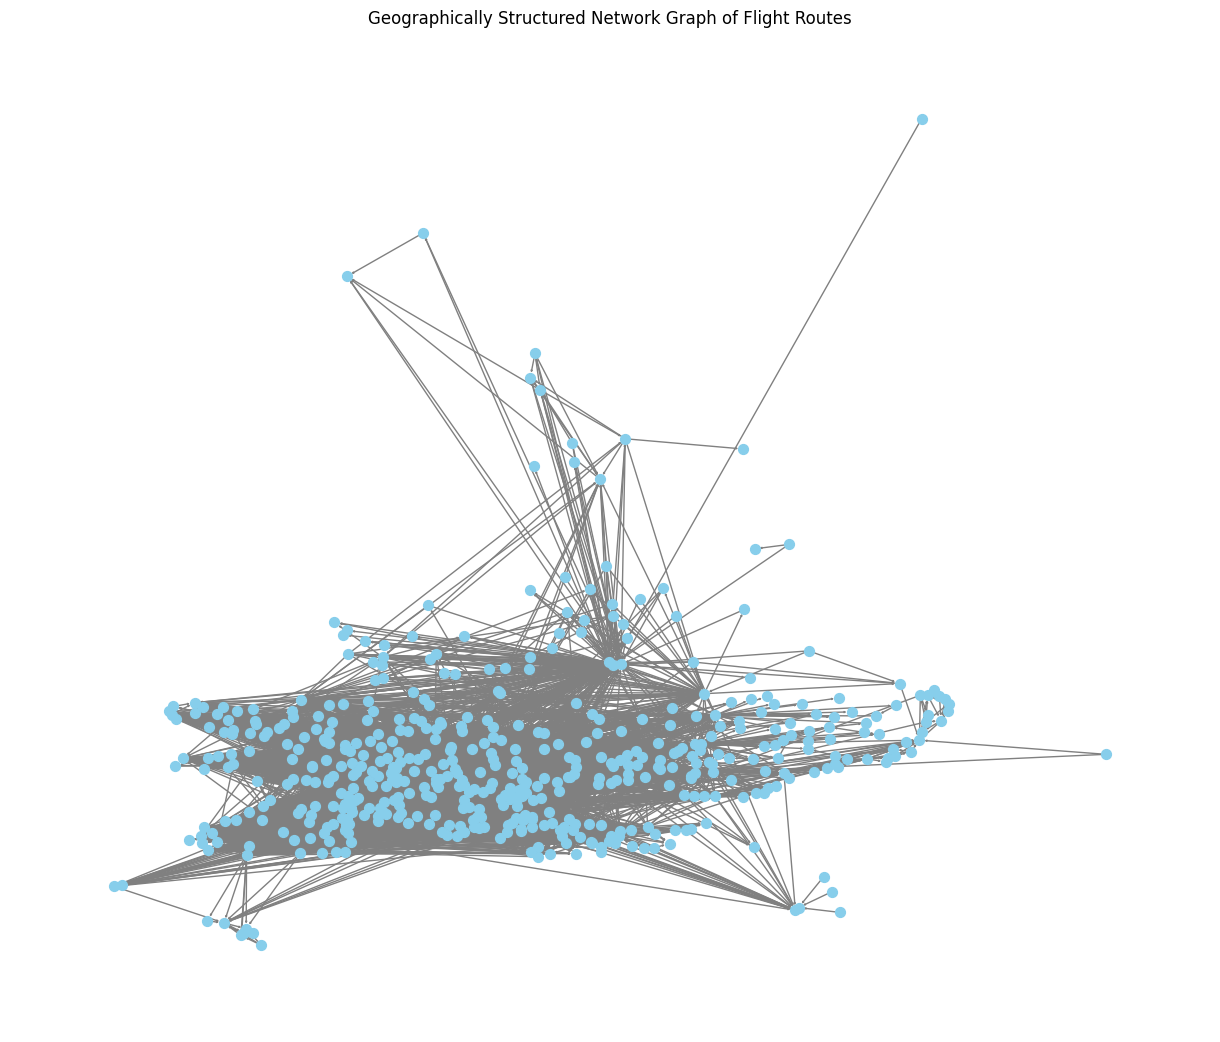

In [70]:
normalised_routes['pos_x'] = normalised_routes['coordinates_x'].apply(lambda x: tuple(map(float, x.split(','))))
normalised_routes['pos_y'] = normalised_routes['coordinates_y'].apply(lambda x: tuple(map(float, x.split(','))))

# Create a directed graph from the DataFrame
G = nx.DiGraph()

# Add nodes with the position being the longitude and latitude
for idx, row in normalised_routes.iterrows():
    G.add_node(row['source city'], pos=row['pos_x'])
    G.add_node(row['destination city'], pos=row['pos_y'])
    G.add_edge(row['source city'], row['destination city'])

# Draw the graph using geographic coordinates as positions
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue', edge_color='gray', arrowstyle='->', arrowsize=2)
plt.title("Geographically Structured Network Graph of Flight Routes")
plt.axis('off')
plt.show()

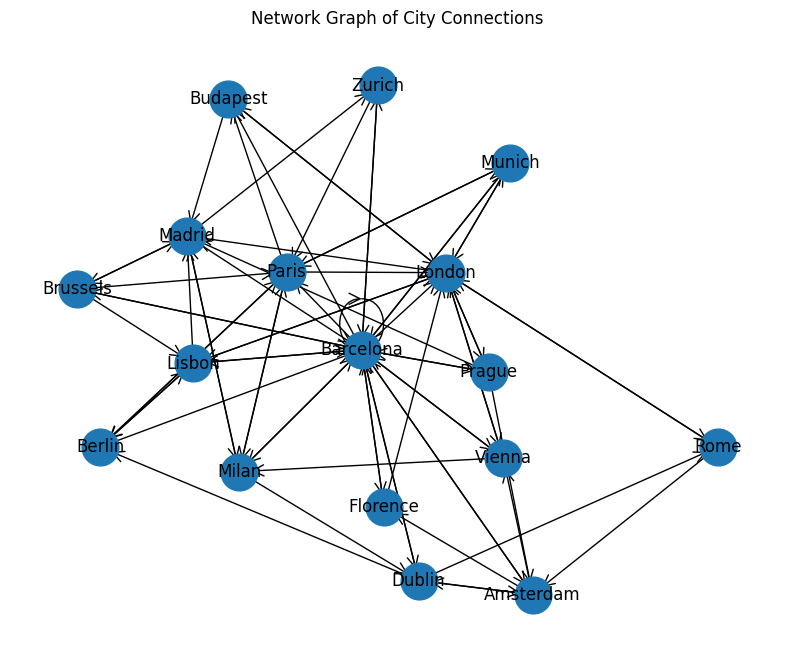

In [112]:
given_data = pd.read_csv("../data/test_.csv")

G1 = nx.from_pandas_edgelist(given_data, 'Departure City', 'Arrival City', create_using=nx.DiGraph())

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G1)  # positions for all nodes
nx.draw_networkx_nodes(G1, pos, node_size=700)
nx.draw_networkx_edges(G1, pos, edgelist=G1.edges(), arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G1, pos, font_size=12, font_family='sans-serif')
plt.title("Network Graph of City Connections")
plt.axis('off')  # Turn off the axis
plt.show()

In [120]:
G = nx.from_pandas_edgelist(normalised_routes, 'source city', 'destination city', create_using=nx.DiGraph())

def find_matching_cities(G, input_city):
    """
    Return a list of cities in the graph that contain the input_city substring, case-sensitive.
    """
    return [node for node in G.nodes if input_city in node]

def has_direct_route(G, source, destination):
    """
    Check if there is a direct route between any matching source and destination cities.
    """
    source_matches = find_matching_cities(G, source)
    destination_matches = find_matching_cities(G, destination)
    for src in source_matches:
        for dest in destination_matches:
            if G.has_edge(src, dest):
                return True
            elif G.has_edge(dest,src):
                return True
    return False

def find_transit_routes(G, source, destination):
    """
    Find all routes from matching source to destination cities with possible transits.
    """
    source_matches = find_matching_cities(G, source)
    destination_matches = find_matching_cities(G, destination)
    all_routes = []
    for src in source_matches:
        for dest in destination_matches:
            paths = list(nx.all_simple_paths(G, src, dest))
            #paths_reverse = list(nx.all_simple_paths(G,dest,src))
            #print(paths)
            #print(paths_reverse)
            for path in paths:
                if 3 <= len(path) <= 4:
                    formatted_path = " -> ".join(path)
                    all_routes.append(formatted_path)
    return all_routes

# Example usage
source_city = 'Amsterdam'
destination_city = 'Munich'

if has_direct_route(G1, source_city, destination_city):
    print(f"There is a direct route from {source_city} to {destination_city}.")
    print("additional steps: ")
    transit_routes = find_transit_routes(G1, source_city, destination_city)
    print("Possible transit routes found:")
    for route in transit_routes:
        print(route)
else:
    print("No direct route found. Checking for transit routes...")
    transit_routes = find_transit_routes(G1, source_city, destination_city)
    if transit_routes:
        print("Possible transit routes found:")
        for route in transit_routes:
            print(route)
    else:
        print("No possible transit routes found.")

No direct route found. Checking for transit routes...
Possible transit routes found:
Amsterdam -> Florence -> Barcelona -> Munich
Amsterdam -> Florence -> London -> Munich
Amsterdam -> Vienna -> London -> Munich
Amsterdam -> Vienna -> Barcelona -> Munich
Amsterdam -> Barcelona -> Paris -> Munich
Amsterdam -> Barcelona -> London -> Munich
Amsterdam -> Barcelona -> Munich
Amsterdam -> Dublin -> Barcelona -> Munich
